**Name: Christ-Brian Amedjonekou**  
**Date: 04/16/2019**  
**PHYS 3600ID-D862 (Machine Learning) Study Hours Linear Regression**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva**

### Abstract

Here, we have the Study Hours Dataset which we'll use to illustrate the Linear Regression | Gradient Descent Models. The Study Hours Dataset contains one feature vector (amount of hours studied) and one target vector (scores on the exam), both of which are quantitive, so Regression seems appropriate here. Since the dataset is simple, cleaning and preprosessing are not necessary. First, we'll use both Tensorflow and Scikit-Learn implementations, then we'll create a Linear Regression (and Gradient Descent) Model from scratch. We'll also evaluate the model's performance, find/tune the hyperparameters, and then provide visualizations of our results.

#### Contents

1. [Data Exploration](#Data-Exploration)
2. [Data Visualization](#Data-Visualization)
3. [Linear Regression Theory](#Linear-Regression-Theory)
    1. [Normal Equations](#Normal-Equation:)
    2. [Cost Function](#Cost-Function:)
4. [Linear-Regression-via-Scikit-Learn](#Linear-Regression-via-Scikit-Learn)
    1. [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:)
    2. [Cross Validation](#Cross-Validation:)
    3. [Measuring Performance](#Measuring-Performance:)
    4. [Visualizations](#Visualizations:)

### Packages   

In [1]:
# Package Imports being use to make things happen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import seaborn as sns

# Special methods/'magic' functions for the visualizations
sns.set()
%matplotlib inline

### Data Exploration

[Back to Contents](#Contents)

* The first thing we'll do is import and label our dataset.

In [2]:
DSH_df = pd.read_csv('Datasets/data_students_hours.csv', 
                     names= ['Feature: Study Time', 'Target: Test Scores'])

* Then we use the `.info()` method to get an idea of how many rows and columns (i.e.: instances, features) we have.

In [3]:
DSH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Feature: Study Time    100 non-null float64
Target: Test Scores    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


* The `.info()` method shows that we have a 100 rows, and 2 columns: one feature, one target. Additionally, all the values are non-null values. Therefore, filling in values/deleting columns (or rows) is unnecessary. Also all the values in the dataframe (minus the labels) are of type `float64` showing that we are dealing with continuous values.    


* **Note**: This dataset is really small but we'll continue use it for a demonstration of both models. We'll also address any potential problems we run into along the way.


* Next, we'll use  the `.describe()` method to get some statistics about the dataset.

In [4]:
DSH_df.describe()

,Feature: Study Time,Target: Test Scores
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


* The `.describe()` method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. 


* Usually when we describe central tendency, we refer to the mean, median, or mode. Central Tendency generally describes a number which summarizes a set of numbers. It's what we expect to see; It's what most likely to occur. For this dataset, the following is used to represent central tendency: 
$$\space$$
$$\text{Mean: Study Times} = 48.95834, \text{ Test Scores} = 72.735051$$  
$$\text{Quartiles }(50\%): \text{Study Times} = 49.634970, \text{ Test Scores} = 72.179542$$
$\space$
    * The 50% Quartile, represents the median of the data set.
    
    
* Standard deviation, and 25% | 50% | 75% Quartiles can be used to  describe the dispersion of the dataset; Dispersion is the extent to which a distribution is stretched or squeezed. Using the first (25%) and third (75%) quartile we can find the interquartile range (IQR). 
$$\space$$
$$\text{Quartiles }(25\%): \text{Study Times} = 41.526164, \text{ Test Scores} = 60.788586$$  
$$\text{Quartiles }(75\%): \text{Study Times} = 56.762631, \text{ Test Scores} = 83.215080$$


* The minimum and maximum values can also be used to describe dispersion (i.e.: The difference between the two describes the range)
    $$\space$$
    * **Minimum:** ($\text{Study Times} = 25.128485, \text{ Test Scores} = 31.707006$)
    * **Maximum:** ($\text{Study Times} = 70.346076, \text{ Test Scores} = 118.591217$)


* Now we have a good idea of the expected study duration and average test score. Below, we'll display the first 5 rows of the dataframe using the `.head()` method. This is just to get a better view of the structure of the dataframe.  

In [5]:
DSH_df.head()

,Feature: Study Time,Target: Test Scores
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


* In the next section, we'll plot that data so we can visualize the data even better.

### Data Visualization

[Back to Contents](#Contents)

* Since the dataset is pretty simple we'll use a scatter plot, the `.scatter()` method, to visualize the distribution of the points.

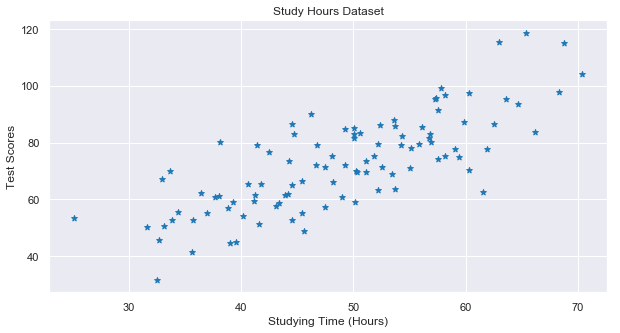

In [6]:
# Defines the Features and Target
features_DSH, Target_DSH = DSH_df['Feature: Study Time'], DSH_df['Target: Test Scores']

# Plots the Features vs Target
fig, ax = plt.subplots(figsize= (10,5))
ax.scatter(features_DSH, Target_DSH,marker='*',color = '#1f77b4')
ax.set(xlabel= 'Studying Time (Hours)', ylabel= 'Test Scores', 
       title= 'Study Hours Dataset');

* Just by looking at the Scatter Plot you can see an upward trend/positve correlation between the amount of hours spent studying and the Test Scores; The more you study, the better your test scores. 


* We could also plot a histogram of the data. We'll use the `sns.distplot()` method. By using the `sns.distplot()` method, we're able to plot a frequency distribution overlaid by a Kernel Density Estimate (specifically using a Gaussian Kernel). With the Kernel Density Estimate, we approximate a Normal (Gaussian) PDF. To verify we also create a `gaussianPlotter()` function that plots the Normal (Gaussian) PDF based upon the formula, $\cfrac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$.   

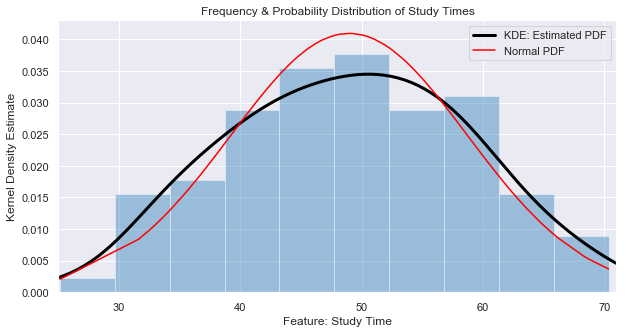

In [13]:
# Creating Gaussian Plot Function
def gaussianPlotter(vector):
    """
    Calculates and plots a Gaussian Probability Density Function (PDF)
    
    Parameters
    ----------
    vector : array-like, shape (n_samples, n_features)
            
    Returns
    -------
    output : matplotlib plt.plot()
    """
    mean = vector.mean()
    std_dev = vector.std()
    normal_pdf = (1/np.sqrt(2*np.pi*std_dev**2))*np.exp(-((vector.sort_values() - mean)**2)/(2*std_dev**2))
    plt.plot(vector.sort_values(), normal_pdf, color= 'red', label= 'Normal PDF')

# Creates the figure, title, and labels 
# Plots a Frequency distribution along w/ a Kernel Density Estimate
plt.figure(figsize= (10,5))

## Gaussian Kernel is used to estimate a Gaussian PDF
sns.distplot(features_DSH, bins= 10, kde= True, color= '#1f77b4', 
             kde_kws= {'kernel': 'gau', 'label': 'KDE: Estimated PDF', 
                       'color': 'black', 'lw': 3})

## Gaussian PDF plotting function
gaussianPlotter(features_DSH)

## Plot Labels
plt.title('Frequency & Probability Distribution of Study Times');
plt.ylabel('Kernel Density Estimate');
plt.xlim(25, 71)
plt.legend(loc= 'best')

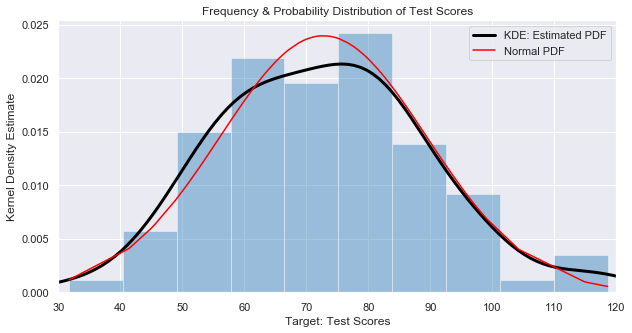

In [8]:
# Creates the figure, title, and labels 
# Plots a Frequency distribution along w/ a Kernel Density Estimate
plt.figure(figsize= (10,5))

## Gaussian Kernel is used to estimate a Gaussian PDF
sns.distplot(Target_DSH, bins= 10, kde= True, color= '#1f77b4', 
             kde_kws= {'kernel': 'gau', 'label': 'KDE: Estimated PDF', 
                       'color': 'black', 'lw': 3})

## Gaussian PDF plotting function
gaussianPlotter(Target_DSH)

## Plot Labels
plt.title('Frequency & Probability Distribution of Test Scores');
plt.ylabel('Kernel Density Estimate');
plt.xlim(30, 120)
plt.legend(loc= 'best')

* This histogram shows that the distribution of Study Times and Test Scores are close to 'normal', and just barely skewed. We can assume the following properties: 68% of the scores fall within 1 deviation of the mean, about 95% within 2 deviations, and 99.7% within 3 deviations. 


* We could also reinforce this histogram with a box plot which is another way to visualize the distribution. Quartiles, dispersion, and skewness are front and center with box plots. We use the `sns.boxplot()` function to demonstrate.

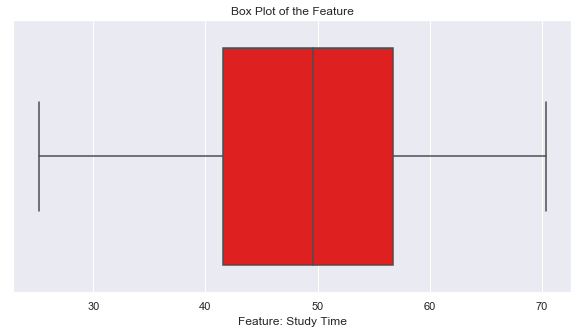

In [20]:
# Creates the figure, title, and labels 
# Plots a Box Plot
plt.figure(figsize= (10,5))

# Plotting the boxplot of the features
sns.boxplot(features_DSH, color= 'red')

# Plot Labels
plt.title('Box Plot of the Feature');

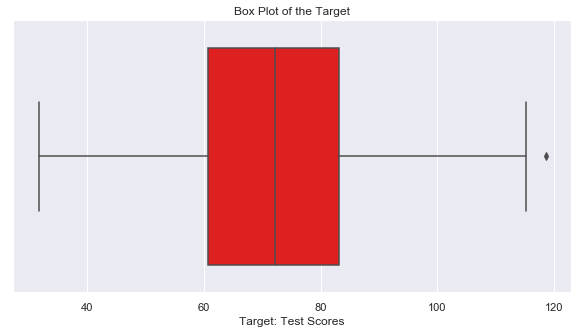

In [21]:
# Creates the figure, title, and labels 
# Plots a Box Plot
plt.figure(figsize= (10,5))

# Plotting the boxplot of the features
sns.boxplot(Target_DSH, color= 'red')

# Plot Labels
plt.title('Box Plot of the Target');

* Based on the box plot it seems 

* The dataset is really small, visualizations will be limited. In the next section, we'll describe Linear Regression theoretically, then implement Scikit-Learn and Tensorflow methods.

### Linear Regression Theory

[Back to Contents](#Contents) | [Normal Equations](#Normal-Equation:) | [Cost Function](#Cost-Function:)

* Linear Regression is a method that is used to model relationships between a target and its features. You can think of the features as independent variables, and the target values as dependent variables. Linear Regression is commonly used for forecasting and predicting quantitive reponses; It is very successful in that domain. Linear Regression, at its simplest, takes on the following form:
$$\space$$
$$\mathbf{\hat{y} = \vec{x_{1}}\cdot\hat{\beta_1} + \hat{\beta_0}}$$
$$\space$$  
    * '$\hat{\beta_m}$' (in this case $m = 0, 1$) represents the weights, or parameters you have to find in order satisfy the linear combination. For linear regression by the Least Squares Method, this is an approximation  
    $$\space$$
    * '$\hat{\beta_0}$' also represents the intercept/bias
    $$\space$$
    * '$\vec{x_{1}}$' represents the independent variable which is a feature (column vector) of the dataset. $x_{0}$ is a variable for the bias term but $x_{0} = 1$ which is why it seems absent above
    $$\space$$
    * '$\hat{y}$' is the dependent variable, or predicted value of the dataset. It's also a column vector

* If a target depends on multiple features, Multiple-Linear (more than 1 feature variable) Regression can be used. It can be expressed using the following linear combination:  
$$\space$$
$$\mathbf{\hat{y} = \vec{x_{1}}\cdot\hat{\beta_1} + \vec{x_{2}}\cdot\hat{\beta_2} + \vec{x_{3}}\cdot\hat{\beta_3} + ... + \vec{x_{m}}\cdot\hat{\beta_m} + \hat{\beta_0}}$$
$$\space$$ 
    * '$m$' represents the number of features
    * '$\hat{\beta_m}$' (in this case $m = 0,1,2,3,...$) represents the weights, or parameters 
    * '$\hat{\beta_0}$' also represents the intercept/bias
    * '$x_{m}$' (where $m = 1,2,3,...$) represents the independent variable which is a feature (column vector) of the dataset. '$x_{m}$' has '$n$' instances, where $n = 1,2,3,...$  
    * $x_{0}$ is still present. It equals 1 for all instances, '$n$'
    * '$\hat{y}$' is the dependent variable, or the predicted value

* However, whether it's simple or multiple-linear regression, it can be more convenient to  express the above linear combinations (which are in vector form) in their matrix form: 
$$\space$$
$$\hat{y} = X \cdot \mathbf{\hat{\beta}}$$
$$\space$$
    * where '$\hat{\beta}$' represents the weights, or parameters you have to find. $\hat{\beta}$ is column vector of parameters $\hat{\beta_m}$. 
    $$\space$$
    $$\hat{\beta} =
    \left[{\begin{array}{c}
    \hat{\beta_0} \\
    \hat{\beta_1} \\
    \vdots \\
    \hat{\beta_m} \\
    \end{array} } \right]$$
    $$\space$$
    * '$X$' represents the the independent variables, the feature values as a matrix
    $$\space$$
    $$X =
    \left[{\begin{matrix}
    1 & x_{1,1} & x_{2,1} & \cdots & x_{m,1} \\
    1 & x_{1,2} & x_{2,2} & \cdots & x_{m,2} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{1,n} & x_{2,n} & \cdots & x_{m,n} \\
    \end{matrix} } \right]$$
    $$\space$$
    * '$\hat{y}$' is the dependent variable which is the predicted value, or target vector
    $$\space$$
    $$\hat{y} =
    \left[{\begin{array}{c}
    \hat{y_1} \\
    \hat{y_2} \\
    \vdots \\
    \hat{y_n} \\
    \end{array} } \right]$$
    $$\space$$

* Matrix Form is more convenient because fitting the model using Linear Regression is commonly done with the Least Squares Method (and Normal Equations). This is regardless of the method of implemention, whether it's our own method, Scikit-Learn, or Tensorflow.
    
##### Normal Equation:

[Back to Contents](#Contents) | [Linear Regression Theory](#Linear-Regression-Theory) | [Cost Function](#Cost-Function:) 


* A Normal Equation, like the one shown below, is an equation that describes the orthogonal relationship between the residual vector $\big(\epsilon = y - X \cdot \hat{\beta}\big)$ and the plane $\big\{X \cdot \vec{\beta} \space | \space \beta \in R^n \big\}$ where '$\vec{\beta}$' is the ***exact*** parameter vector needed to solve $y = X \cdot \vec{\beta}$. $\space \vec{\beta} =
\left[{\begin{array}{c}
\beta_0 \\
\vdots \\
\beta_m \\
\end{array} } \right]$. 


* However, since we have a dataset with more instances '$m$' than features '$n$' to describe them, the result is an inconsistent system. Inconsistent systems indicate that the best we can do are approximations, meaning '$\hat{y}$' and '$\mathbf{\hat{\beta}}$': 

> **Normal equations for least squares**
> $$X^T \hat{y} = X^T X \cdot \mathbf{\hat{\beta}}$$

  
* We want the best approximations, of course, and the way to do that is by minimizing a cost function.     

##### Cost Function:

[Back to Contents](#Contents) | [Linear Regression Theory](#Linear-Regression-Theory) | [Normal Equations](#Normal-Equation:) 

* The cost function that we want minimize expresses the size of the residual vector. In other words, minimizing the cost function minimizes the size of the residual vector.


* There are many cost functions that we could use to describe the size of the residual vector, $\epsilon$. However minimizing one, minimizes the others as they are closely related. Some cost functions include:

> ***Types of Cost Functions:***  
> * **2-Norm:** $||\epsilon||_{2} = \sqrt{\sum_{j = 1}^{m}\epsilon_m^2}$  
> * **Squared Error (SE):** $\big(||\epsilon||_{2} \big)^2 = \sum_{j = 1}^{m}\epsilon_m^2$  
> $\space$  
> * **Mean Squared Error (MSE):** $\frac{\big(||\epsilon||_{2} \big)^2}{m} = \frac{1}{m}\sum_{j = 1}^{m}\epsilon_m^2$ 
> $$\space$$  
> * **Root Mean Squared Error (RMSE):** $\frac{||\epsilon||_{2}}{\sqrt{m}} = \sqrt{\frac{1}{m}\sum_{j = 1}^{m}\epsilon_m^2}$    


* To minimize the cost function, we have to find the solution to the Normal Equation. In other words, we have to find the value of the approximated vector $\mathbf{\hat{\beta}}$. We rewrite the the Normal Equation in terms of $\mathbf{\hat{\beta}}$ to get the following:

> ***Solution to the Normal Equation:***
> $$\mathbf{\hat{\beta}} = \big(X^T X\big)^{-1} X^T \hat{y}$$


* In the following sections, we'll provide a demonstration via 3 implementations: Scikit-Learn, TensorFlow, and from scratch.

### Linear Regression via Scikit-Learn 

| [Back to Contents](#Contents) | [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:) | [$k$-fold Cross Validation](#$k$-fold-Cross-Validation:) | [Measuring Performance](#Measuring-Performance:) | [Visualizations](#Visualizations)

* First, we'll implement the Linear Regression Model using the simple Train/Test Validation Stategy 
* Then, we'll follow up with an implementation using K-Fold Cross Validation 
* We'll examine the model performance by looking at the $r^2$ scores
* Finally, we'll plot a visualization of the model against the data points

##### Implementation via Train/Test Validation Strategy:

| [Back to Contents](#Contents) | [Linear-Regression-via-Scikit-Learn](#Linear-Regression-via-Scikit-Learn) | [$k$-fold Cross Validation](#$k$-fold-Cross-Validation:) | [Measuring Performance](#Measuring-Performance:) | [Visualizations](#Visualizations:)


* For this implementation, we do several things: create the model, fit the data using the training set, and create predictions.  

* Creating a function to find the Residuals is also done for this implementation.

In [9]:
# Creating a function to find the Residuals 
def finding_residuals(X, y, beta0, beta1):
    """
    Finds the residual 
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
 
    y : array_like, shape (n_samples, n_targets)

    beta0 : A float, the approximated intercept. 
            An element of the least square solution, Column Vector beta
            
    beta1 : A float, the approximated intercept. 
            An element of the least square solution, Column Vector beta 
            
    Returns
    -------
    output : Array-like, the residuals
    """
    beta = np.array([beta0, beta1])
    X = np.hstack((np.ones(X.shape), X))
    return y.reshape(10,1) - np.dot(X, beta.reshape(-1,1))

* We also compare the predicted scores with actual test scores by finding the residuals. If our model is good, then the length of the residual should not be significantly large.

In [10]:
# Assigning Linear Regression to variable
model_sklearn = LinearRegression()


# Create a test set and training set
X_train, X_test, y_train, y_test = train_test_split(features_DSH.to_numpy().reshape(-1,1), 
                                                    Target_DSH.to_numpy(), test_size= 0.10, 
                                                    random_state= 30)

# Fitting the model to the training set
model_sklearn.fit(X_train, y_train)

# Predictions 
y_pred = model_sklearn.predict(X_test)
printString = 'Residual as the Difference between Test Scores & Predicted Scores: \n{} \n'
printString_ = 'Residual using (r = y - X*beta ): \n{} \n'
printStr = 'Parameters (Slope/Intercept): \n{} \n'
parameters = np.array([model_sklearn.coef_[0], model_sklearn.intercept_]).reshape(2,1)
print('Predicted Test Scores: \n{} \n'.format(y_pred))
print(printStr.format(parameters))
print(printString.format((y_test - y_pred).reshape(10,1)))
print(printString_.format(finding_residuals(X_test, y_test, 
                                            model_sklearn.intercept_, 
                                            model_sklearn.coef_)))
print('R^2 scores: {}'.format(metrics.r2_score(y_test, y_pred)))

Predicted Test Scores: 
[ 94.99769926  78.62497891  83.61979053  61.47421276  71.30648722
 100.44243462  93.98406058  66.20623052  82.82955018  58.07598427] 

Parameters (Slope/Intercept): 
[[1.31000868]
 [8.28846523]] 

Residual as the Difference between Test Scores & Predicted Scores: 
[[-11.1191346 ]
 [  7.04322424]
 [ -9.53566041]
 [  4.0880885 ]
 [  4.02475508]
 [  3.81466696]
 [ 24.60715672]
 [  7.4813338 ]
 [ -2.62202704]
 [  3.29092027]] 

Residual using (r = y - X*beta ): 
[[-11.1191346 ]
 [  7.04322424]
 [ -9.53566041]
 [  4.0880885 ]
 [  4.02475508]
 [  3.81466696]
 [ 24.60715672]
 [  7.4813338 ]
 [ -2.62202704]
 [  3.29092027]] 

R^2 scores: 0.6365227334362467


* We found the residuals with two, but equivalent, ways: 
    
    1. Finding the difference between the true test scores and predicted scores which I find to be more intuitive. It answers the question on how close are our predictions to our real scores.
    2. Using $\epsilon = y - X \cdot \hat{\beta}$ to find the length of the residuals.
    

* This shows pretty reasonable results since only one prediction had a large difference between predicted and real scores. 


* For a better description of performance, we'll look at the $r^2$ scores. They are printed here but we'll reserve the conversation for *Measuring Performance* section. For now, we'll discuss another and more effective validation strategy known as *k-fold Cross Validation* and the python method `cross_val_predict()`.  

##### $k$-fold Cross Validation: 

| [Back to Contents](#Contents) | [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:) | [Linear-Regression-via-Scikit-Learn](#Linear-Regression-via-Scikit-Learn) | [Measuring Performance](#Measuring-Performance:) | [Visualizations](#Visualizations:)

* $k$-fold Cross Validation is another validation strategy we'll use to test the reliability of our model.
> In $k$-fold cross validation ($k = \text{the number of splits}$), we're allowed to select the number of splits we would like to use to train/test the model. Each split participates in the training and testing phase of the model. In other words, each split will have a turn as the test set or *holdout set*; All the data gets used.

* The reason we consider this strategy/method is because we lack data. While this is partly 
* We'll test whether our model performs roughly the same across all train/test splits. 
 
* The value of $k$ in our k-fold cross validation is set to 10. The code segment below shows how the data set is split into 10 train/test splits. 

```python
for train, test in KFold(10).split(features_DSH.to_numpy().reshape(-1,1)):
    print('Train: \n\n', train, '\n\nTest: \n\n', test, '\n\n')
```

In [11]:
# 10-fold cross validation predictions
predict_Linear = cross_val_predict(model_sklearn, features_DSH.to_numpy().reshape(-1,1), 
                                   Target_DSH.to_numpy().reshape(100,1), cv= 10)
residuals_ = Target_DSH.to_numpy().reshape(-1,1)[::10] - predict_Linear[::10]
print('First 10 predicted "y" values of the 100 instances, "x": \n \n{} \n'.format(predict_Linear[::10]))
print('Residuals for the First 10 predicted "y" values: \n \n{} \n'.format(residuals_))

First 10 predicted "y" values of the 100 instances, "x": 
 
[[51.43802312]
 [68.47821657]
 [94.76339392]
 [77.31544681]
 [67.24409421]
 [57.37566815]
 [62.47513362]
 [50.16397211]
 [83.2901182 ]
 [50.15048366]] 

Residuals for the First 10 predicted "y" values: 
 
[[-19.73101727]
 [-13.31253942]
 [-10.88482926]
 [-13.95665649]
 [-14.56111084]
 [ 22.79060729]
 [ -0.79109609]
 [  0.22869802]
 [ -3.08259506]
 [ 17.02017211]] 



##### Measuring Performance: 

| [Back to Contents](#Contents) | [Scikit-Learn Implementation](#Scikit-Learn-Implementation:) | [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:) | [$k$-fold Cross Validation](#$k$-fold-Cross-Validation:) | [Visualizations](#Visualizations:)

In [ ]:
# 10-fold cross validation scoring
predict_Linear = cross_val_predict(model_sklearn, features_DSH.to_numpy().reshape(-1,1), 
                                   Target_DSH.to_numpy().reshape(100,1), cv= 10)
residuals_ = Target_DSH.to_numpy().reshape(-1,1)[::10] - predict_Linear[::10]
print('First 10 predicted "y" values of the 100 instances, "x": \n \n{} \n'.format(predict_Linear[::10]))
print('Residuals for the First 10 predicted "y" values: \n \n{} \n'.format(residuals_))

##### Visualizations:

| [Back to Contents](#Contents) | [Linear-Regression-via-Scikit-Learn](#Linear-Regression-via-Scikit-Learn) | [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:) | [Measuring Performance](#Measuring-Performance:) | [$k$-fold Cross Validation](#$k$-fold-Cross-Validation:) 

In [ ]:
# plotting the points in a scatter plot
plt.scatter(features_DSH, labels_DSH,marker='*',color = 'm');

# fitting the model 
linearModel.fit(features_DSH.reshape(-1,1), labels_DSH)
plt.plot(features_DSH, linearModel.coef_* features_DSH + linearModel.intercept_, color = 'k')
plt.title('Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('F(Features)')

9\. However these can also be calculated by hand using the formulas on the linear regression slides. Code up the formulas below and report your coefficients for slope and intercept.

$$S S_{xy} = \sum x_i y_i - \frac{(\sum x_i \sum y_i)}{n}$$

$$S S_{xx} = \sum x_i^2 - \frac{(\sum x_i)^2}{n}$$

$$m = \frac{S S_{xy}}{S S_{xx}}$$

$$b = \bar{y} - m * \bar{x}$$

$$\text{where } n = \text{ number of points and the overhead bar represent the mean.}$$



In [ ]:
def ssXY(x, y):
    """Calculates the Sum of Squares for 'x' and 'y'."""
    n = y.size
    return sum(x*y) - ((sum(x)*sum(y))/n)

    
def ssXX(x):
    """Calculates the Sum of Squares for 'x'."""
    n = x.size
    return sum(x*x) - ((sum(x)*sum(x))/n)

In [ ]:
slope = ssXY(features_DSH, labels_DSH)/ssXX(features_DSH)
intercept = labels_DSH.mean() - slope * features_DSH.mean()

In [ ]:
print('The slope is: {1} and the intercept is: {0}'.format(intercept, slope))

In [ ]:
# plotting the points in a scatter plot
plt.scatter(features_DSH, labels_DSH,marker='*',color = 'm');

print('$R^2$ scores:',metrics.r2_score(labels_DSH, predict_Linear))

# fitting the model 
plt.plot(features_DSH, slope* features_DSH + intercept, color = 'k')
plt.title('Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('F(Features)')

10\. Looking at the data (hours vs scores), do you think it would make sense to fit these data using a logistic regression model? Why or why not?

* **Based on the label data below, Logistic Regression would not be ideal at all. Tt would not make sense to fit this data using a logistic regression model. The reason is because we don't have or expect categorical predictions. Specically, I mean that the target vector ```labels_DSH ``` isn't categorical (n true/false, yes/no, up/down, etc). Check ```labels_DSH[:20] ```**

In [ ]:
labels_DSH[:20]

Extra credit: Run the gradient descent notebook and report the coefficients you found here. Calculate the cost function (found in the linear regression notebook) for the slope, intercept values you found with the gradient descent method and the values you found above, using the formulas. Which set of values is best? 